<a href="https://colab.research.google.com/github/seansothey/CSC685/blob/master/Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [0]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
from sklearn import metrics
import time



# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

#1- Data Scrubbing

Load and View Data

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/seansothey/CSC685/master/PRSA_data_2010.1.1-2014.12.31.csv', index_col=0)

In [45]:
data.head(30) # view first 30 rows 

# 13 attributes
# No: row number
# year: year of data in this row
# month: month of data in this row
# day: day of data in this row
# hour: hour of data in this row
# pm2.5: PM2.5 concentration (ug/m^3)
# DEWP: Dew Point (â„ƒ)
# TEMP: Temperature (â„ƒ)
# PRES: Pressure (hPa)
# cbwd: Combined wind direction
# Iws: Cumulated wind speed (m/s)
# Is: Cumulated hours of snow
# Ir: Cumulated hours of rain

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0


Attribute pm2.5 had many missing data in first 30 rows. Let's find how many observations were missing using "isnull" function

In [46]:
data.isnull().sum() # 2067 were missing

year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

Plot to see the relationships between the key variables PM2.5 vs some others

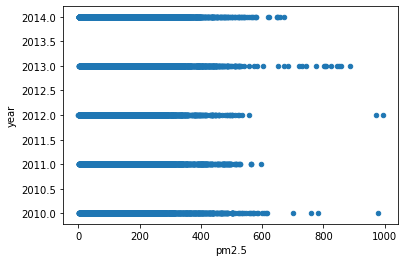

In [47]:
# pm2.5 and year
data.plot(x='pm2.5', y='year', kind='scatter')

We could see that the years 2010, 2012, and 2013, people in Beijing were likely to have more “bad” days than the years in 2011 and 2014. Especially during the year 2013, the average of PM2.5 was significantly higher than other years.

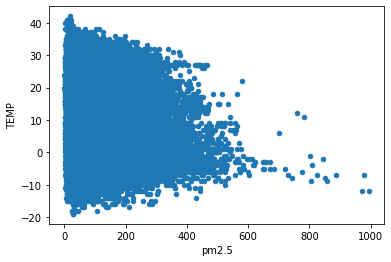

In [48]:
# pm2.5 and TEMP
data.plot(x='pm2.5', y='TEMP', kind='scatter')

We could see that when the temperature is low, it’s more likely to have high PM2.5, that means people might likely to get “high polluted” days.

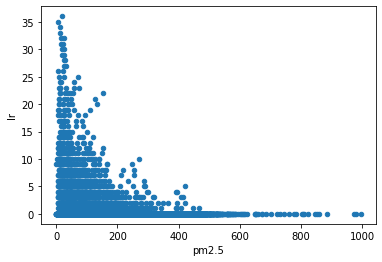

In [49]:
# PM2.5 and rain (Ir)
data.plot(x='pm2.5', y='Ir', kind='scatter')

It’s pretty clear that is was extremely unlikely to have “polluted” days during rainy days, especially when Beijing got a lot rains.

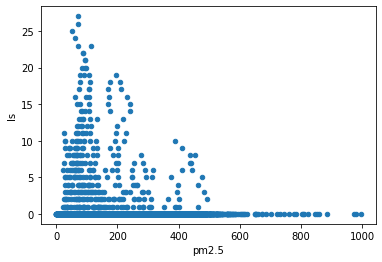

In [50]:
# pm2.5 and snow (Is)
data.plot(x='pm2.5', y='Is', kind='scatter')

We could see it’s somewhat likely to have medium “polluted” days when it was snowing, but only with lightly snowy days.

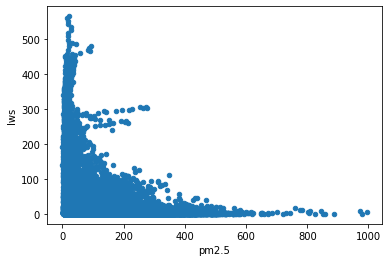

In [51]:
# pm2.5 vs wind speed (Iws)
data.plot(x='pm2.5', y='Iws', kind='scatter')

We could see winds reduces the level of PM2.5 at the most time, but when we look at the graph around 200–300, we can see that PM2.5 was not going down as expected.

Now, let's plot all features vs PM2.5

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


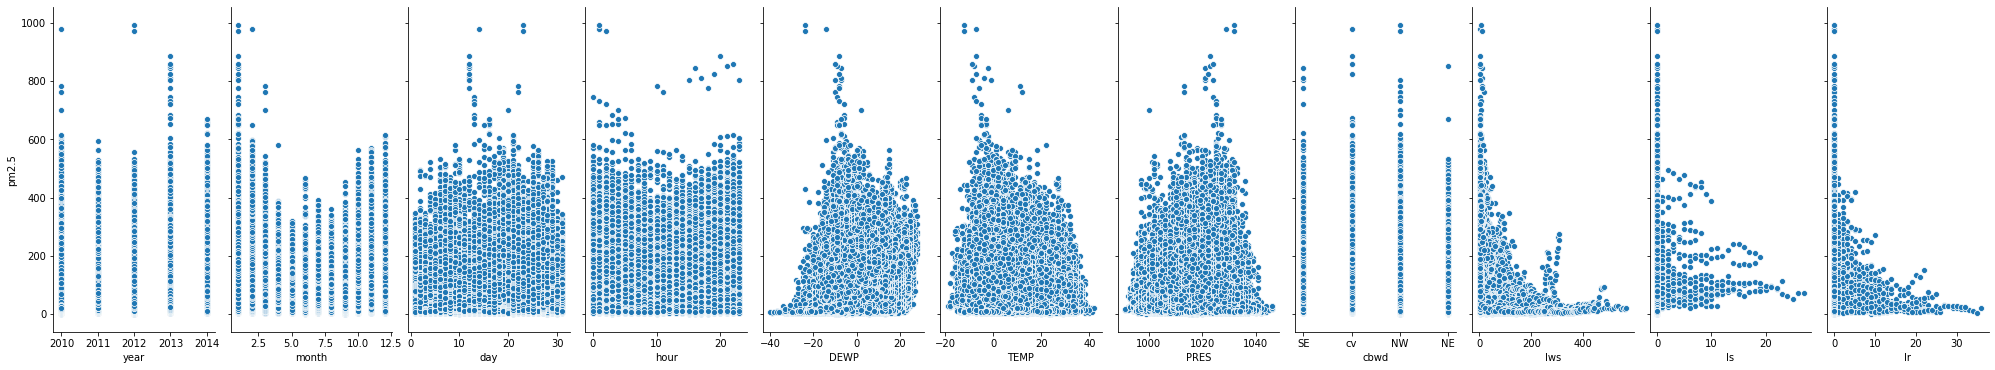

In [52]:
sns.pairplot(data, x_vars=['year','month','day','hour','DEWP','TEMP','PRES','cbwd','Iws','Is','Ir'], y_vars='pm2.5', size=5, aspect=0.5)

Handling Missing Data

In [53]:
# There are many ways to handle the missing data as below:
# 1- drop the data -> data.dropna()
# 2- fill NA data with zero (0) -> data.fillna(0)
# 3- forward-fill to propagate the previous value forward -> data.fillna(method='ffill')
# 4- back-fill to propagate the next values backward -> data.fillna(method='bfill')
# 5- fill with mean value -> data['pm2.5'].mean()

# I'm going to choose mean value
mean = data['pm2.5'].mean()
data_mean = data.fillna(mean)
data_mean

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,98.613215,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,98.613215,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,98.613215,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,98.613215,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,98.613215,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43820,2014,12,31,19,8.000000,-23,-2.0,1034.0,NW,231.97,0,0
43821,2014,12,31,20,10.000000,-22,-3.0,1034.0,NW,237.78,0,0
43822,2014,12,31,21,10.000000,-22,-3.0,1034.0,NW,242.70,0,0


Features Scaling

In [54]:
# First, convert categorical features of "cbwd" to a numerical representation
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
data_mean.cbwd = encoder.fit_transform(data_mean.cbwd.values.reshape(-1, 1))
data_mean.head(30)


,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,98.613215,-21,-11.0,1021.0,1.0,1.79,0,0
2,2010,1,1,1,98.613215,-21,-12.0,1020.0,1.0,4.92,0,0
3,2010,1,1,2,98.613215,-21,-11.0,1019.0,1.0,6.71,0,0
4,2010,1,1,3,98.613215,-21,-14.0,1019.0,1.0,9.84,0,0
5,2010,1,1,4,98.613215,-20,-12.0,1018.0,1.0,12.97,0,0
6,2010,1,1,5,98.613215,-19,-10.0,1017.0,1.0,16.10,0,0
7,2010,1,1,6,98.613215,-19,-9.0,1017.0,1.0,19.23,0,0
8,2010,1,1,7,98.613215,-19,-9.0,1017.0,1.0,21.02,0,0
9,2010,1,1,8,98.613215,-19,-9.0,1017.0,1.0,24.15,0,0


Separate Data "X" and Label "y"

In [55]:
X = data_mean.drop('pm2.5', axis=1) #data
y = data_mean['pm2.5'] #label
X.shape, y.shape

((43824, 11), (43824,))

Data Normalization and Scaling

In [0]:
from sklearn import preprocessing
scaler = preprocessing.Normalizer()
X = scaler.fit_transform(X)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-3,3))
y = scaler.fit_transform(y.values.reshape(-1,1))

In [60]:
X.shape, y.shape

((43824, 11), (43824, 1))

Split training and testing set with ratio 70%-30%

In [0]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

#2- Perform linear and non-linear regression

#Multiple Linear Regression Model

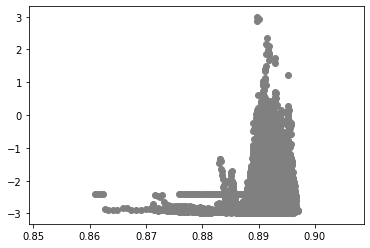

In [62]:
# Plot the data against label
plt.scatter(X[:,0], y,  color='gray')
plt.show()

In [0]:
# Build the model
from sklearn import linear_model 
lin_model = linear_model.LinearRegression()
t0 = time.time()
lin_model.fit(X_train,y_train)
t1 = time.time()

In [64]:
#See the training time
t_ln = t1-t0
print("Training took {:.2f}s".format(t_ln))

Training took 0.02s


In [65]:
# Get the number of predictions
y_pred = lin_model.predict(X_test)
y_pred

array([[-2.64375084],
       [-2.1160481 ],
       [-2.24413361],
       ...,
       [-2.65463325],
       [-2.98747034],
       [-2.08188262]])

In [66]:
# See the coefficients for the predictors
lin_model.coef_.reshape(-1,1)

array([[-37.9603234 ],
       [-18.59679856],
       [  9.69124585],
       [ 18.82430103],
       [ 56.97254765],
       [-82.87281867],
       [-44.19807963],
       [138.3417938 ],
       [ -6.1209844 ],
       [-29.92298567],
       [-85.32189315]])

In [0]:
data_no_pm = data.drop('pm2.5', axis=1) # for ploting this section only

In [68]:
coef_table = pd.DataFrame(lin_model.coef_.reshape(-1,1), data_no_pm.columns, columns=['Coefficient'])  
coef_table

,Coefficient
year,-37.960323
month,-18.596799
day,9.691246
hour,18.824301
DEWP,56.972548
TEMP,-82.872819
PRES,-44.198080
cbwd,138.341794
Iws,-6.120984
Is,-29.922986


In [69]:
# See the intercept
lin_model.intercept_

array([51.65656283])

In [70]:
# See the table of Actual vs Predicted
pred_table = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
pred_table

,Actual,Predicted
0,-2.927565,-2.643751
1,-2.456740,-2.116048
2,-2.613682,-2.244134
3,-1.672032,-1.890574
4,-2.855131,-2.486595
...,...,...
13143,-2.939638,-2.550633
13144,-2.927565,-2.807703
13145,-2.843058,-2.654633
13146,-2.722334,-2.987470


In [71]:
# See the accuracy
ln_acc = lin_model.score(X, y)
ln_acc

0.26088396480731224

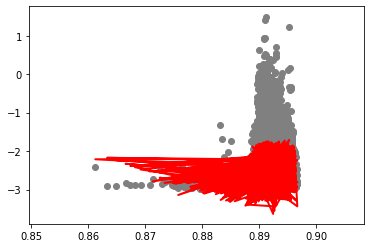

In [72]:
# Plot the model line
plt.scatter(X_test[:,0], y_test,  color='gray')
plt.plot(X_test[:,0], y_pred, color='red', linewidth=2)
plt.show()

Finding the values for MAE, MSE, and RMSE

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.3354201636639659
Mean Squared Error: 0.21384182055598108
Root Mean Squared Error: 0.4624303413012398


#Polynomial Regression

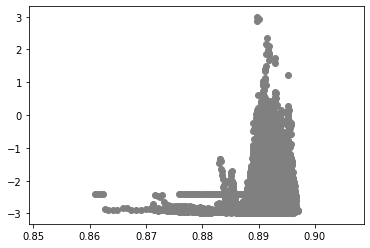

In [74]:
# Plot the data against label
plt.scatter(X[:,0], y,  color='gray')
plt.show()

In [0]:
# Build the model
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)

In [0]:
# Transform dataset into polynomial version
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
y_train_poly = poly.fit_transform(y_train)
y_test_poly = poly.fit_transform(y_test)

In [0]:
# Create another linear model to feed the data above
poly_model = linear_model.LinearRegression()
t0 = time.time()
poly_model.fit(X_train_poly, y_train_poly)
t1 = time.time()

In [78]:
#See the training time
t_poly = t1-t0
print("Training took {:.2f}s".format(t_poly))

Training took 2.99s


In [79]:
# Get the number of predictions
y_pred_poly = poly_model.predict(X_test_poly)
y_pred_poly

array([[  1.        ,  -2.92382812,   8.625     , -25.34375   ,
         72.3125    ],
       [  1.        ,  -2.4140625 ,   6.08203125, -15.5       ,
         40.25      ],
       [  1.        ,  -2.06835938,   4.828125  , -11.25      ,
         28.        ],
       ...,
       [  1.        ,  -2.48242188,   6.3515625 , -16.75      ,
         44.375     ],
       [  1.        ,  -2.83789062,   8.328125  , -24.34375   ,
         69.125     ],
       [  1.        ,  -1.28710938,   2.01953125,  -2.9375    ,
          3.5       ]])

In [80]:
# See the coefficients for the predictors
poly_model.coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.18675441e+08,  5.34881293e+12, -8.14422214e+11, ...,
         0.00000000e+00,  0.00000000e+00,  1.90745236e+12],
       [ 8.90392740e+08, -1.01458522e+13,  2.68052788e+12, ...,
         0.00000000e+00,  0.00000000e+00, -3.41905082e+12],
       [ 7.46958528e+09,  6.15766837e+13, -8.26861461e+12, ...,
         0.00000000e+00,  0.00000000e+00,  2.40898695e+13],
       [-1.15482720e+10, -9.72585244e+13,  2.37761566e+13, ...,
         0.00000000e+00,  0.00000000e+00, -4.02339922e+13]])

In [81]:
# See the intercept
poly_model.intercept_

array([ 1.00000000e+00, -1.63798757e+13,  2.90847510e+13, -2.04022513e+14,
        3.35317679e+14])

In [82]:
# See the table of Actual vs Predicted
pred_poly_table = pd.DataFrame({'Actual': y_test_poly.flatten(), 'Predicted': y_pred_poly.flatten()})
pred_poly_table

,Actual,Predicted
0,1.000000,1.000000
1,-2.927565,-2.923828
2,8.570639,8.625000
3,-25.091106,-25.343750
4,73.455855,72.312500
...,...,...
65735,1.000000,1.000000
65736,-1.008048,-1.287109
65737,1.016161,2.019531
65738,-1.024340,-2.937500


In [83]:
# See the accuracy
poly5_acc = poly_model.score(X_train_poly, y_train_poly)
poly5_acc

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.6439592665938529

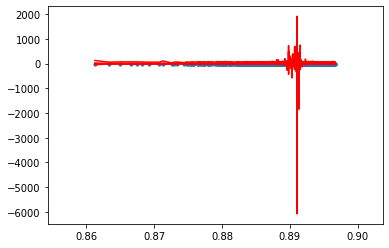

In [84]:
# Plot the model line
import operator
plt.scatter(X_test[:,0], y_test, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test[:,0],y_pred_poly), key=sort_axis)
X_test[:,0], y_pred_poly = zip(*sorted_zip)
plt.plot(X_test[:,0], y_pred_poly, color='r')
plt.show()

Finding the values for MAE, MSE, and RMSE

In [85]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_poly, y_pred_poly))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_poly, y_pred_poly))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_poly, y_pred_poly)))

Mean Absolute Error: 7.279690954177648
Mean Squared Error: 964.5531784923023
Root Mean Squared Error: 31.05725645468869


#3- Evaluate the performance of  each model using k-fold cross validation

Multiple Linear Regression Model

In [86]:
# Check the accuracy with k=5 folds
from sklearn.model_selection import cross_val_score

val_score1 = cross_val_score(lin_model, X_train, y_train, cv=5)
val_score1

array([0.25767765, 0.24949358, 0.26215772, 0.25141255, 0.26333407])

In [87]:
# See the average accuracy of CV linear
np.mean(val_score1)

0.2568151132010203

The confusion matrix is not supported for this dataset. Confustion Matrix is used to tell you how many predictions were classified correctly or incorrectly. And here, we are looking at a regression model, which gives you a continous output (not classification).

Polynomial Regression Model

In [88]:
# Check the accuracy with k=5 folds
from sklearn.model_selection import cross_val_score

val_score2 = cross_val_score(poly_model, X_train, y_train, cv=5)
val_score2

array([0.25767765, 0.24949358, 0.26215772, 0.25141255, 0.26333407])

In [89]:
# See the average accuracy of CV non-linear
np.mean(val_score2)

0.2568151132010203

Again, the confusion matrix is not supported for the continous output.

#4- Plot and compare learning curves for all models 

Multiple Linear Regression Model vs CV

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=50)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train score")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation score")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

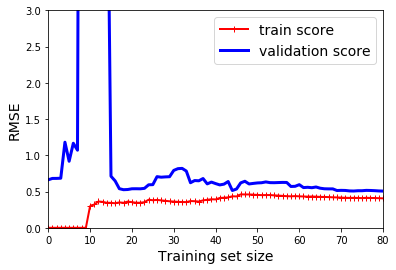

In [91]:
plot_learning_curves(lin_model, X_train, y_train)
plt.axis([0, 80, 0, 3])                         
plt.show()                                  

Multiple Linear Regression Model vs CV

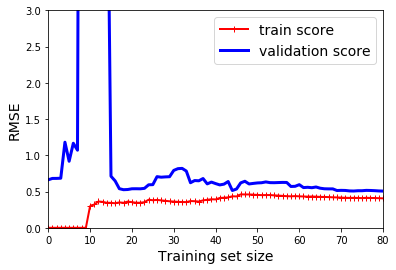

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(poly_model, X_train, y_train)
plt.axis([0, 80, 0, 3])            
plt.show()                        

#5- Conclusion

In this Beijing PM2.5 dataset, many graphs were ploted at the begining to see the relationship between key feature against others, as for the data visualization. Then the normalization and scaling technique were introduced to clean the data base on those relevant features. For example, the unrelevant feature "No" was dropped and the feature "cbwd" were converted and scaled from string data value to numerical value. The feature extracing were use to create a new dataset call "X" (input data) and "y" (label). In other words, creating the new independent variable "X" and dependent variable "y".    
After new clean data is ready, both multiple Linear Regression and Polynomial Linear Regression models were creted with the help of the Scikit-Learn machine learning library.    


After many experiments above, the Linear Regression model is considered underfitting with the accuracy score around 26%, and the degree-4 Polynomial Linear Regression seems to be overfitting even with a not-high accuracy, about 65%. By considering it's overfitting because the fitted line behaviour were zic-zac all over those data points. Last but not least, the model Cross Validation was used to validate both models.  
Below are the two charts of comparision training time and accuracy, between Linear and Non-Linear (degree 2 to 6) model.

https://github.com/seansothey/CSC685/blob/master/Pro4_barchart.PNG             
https://github.com/seansothey/CSC685/blob/master/Pro4_NL.PNG

#Linear vs Non-Linear Model

![alt text](https://drive.google.com/uc?id=1-C26ELYuY9eq3P3Zpocn3A0pOjs6I4m9)

![alt text](https://drive.google.com/uc?id=1Ou-o-AzlEZ7hmdLnGutTQ7v6AAJiVN9H)

#Non-Linear Polynomial Degree Works

![alt text](https://drive.google.com/uc?id=1WHAm6QgdjLs_0uuuzyaehVUPU-euyzNb)

Overal, the performance of Polynomial Linear Regression learning model, strongly depends on the polynomial's degree. The higher degree the higher accuracy. After many experiments, playing around with degree and train-test-split ratio, the degree-4 was chosen for the best performance for both accuracy and training time. There's no perfect world, the trade-off of increasing accuracy is slowing down the learning speed. Unfortunately, there's no theory of choosing a proper degree to have the best model beside running more experiment and see the differences; cases and conditions are basee on your own preferences.      
But, don't worry! However, we can still determine which model perform best in this dataset, and the winner is Non-Linear model. Horray !!!   